In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [57]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder

In [50]:
from sklearn.metrics import accuracy_score, classification_report


In [3]:
stroke_df = pd.read_csv("stroke-data.csv")

In [4]:
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


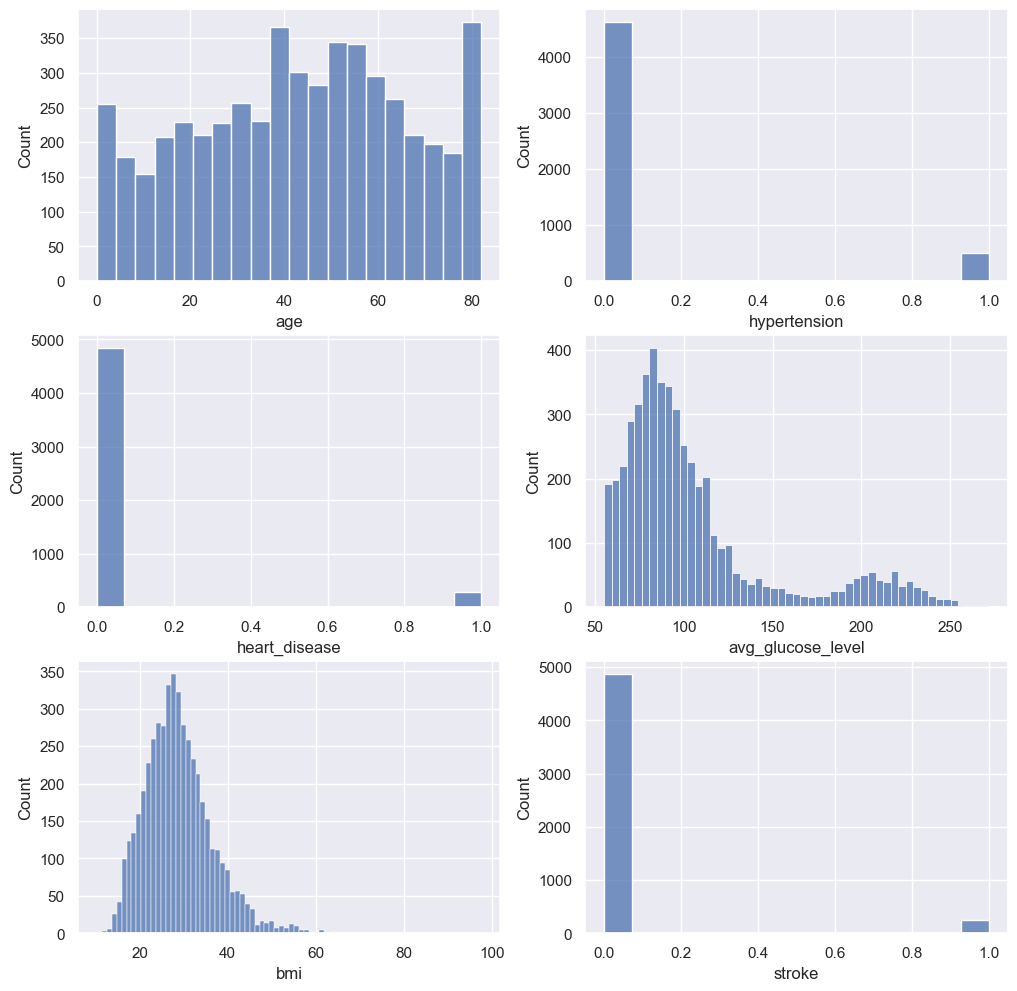

In [8]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12,12)
a = sns.histplot(stroke_df['age'] , ax=axes[0][0])
a = sns.histplot(stroke_df['hypertension'] , ax=axes[0][1])
a = sns.histplot(stroke_df['heart_disease'] , ax=axes[1][0])
a = sns.histplot(stroke_df['avg_glucose_level'] , ax=axes[1][1])
a = sns.histplot(stroke_df['bmi'] , ax=axes[2][0])
a = sns.histplot(stroke_df['stroke'] , ax=axes[2][1])

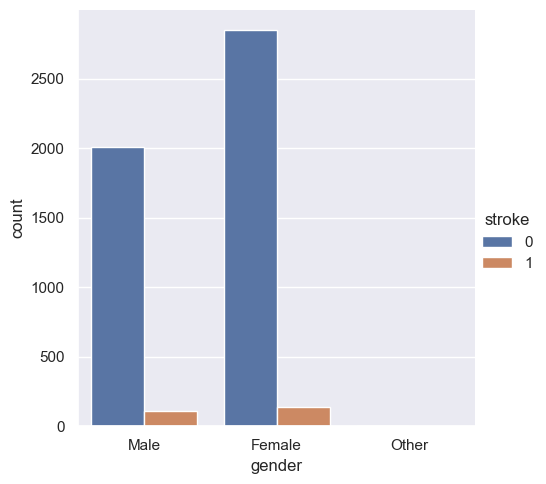

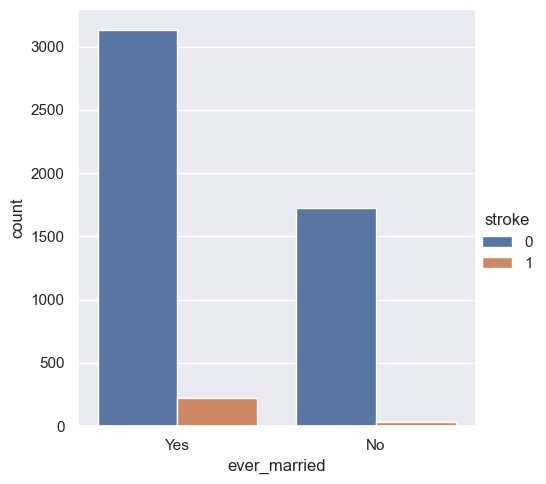

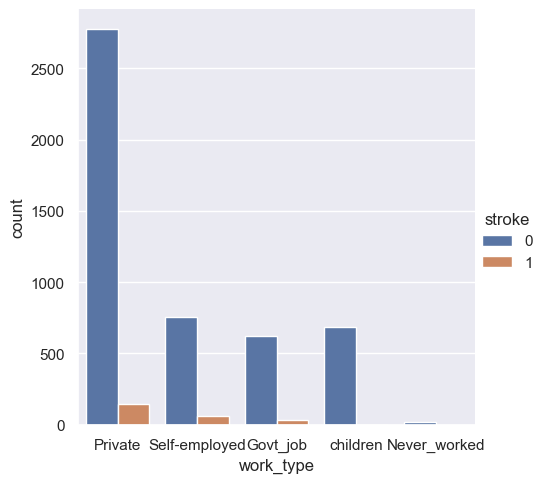

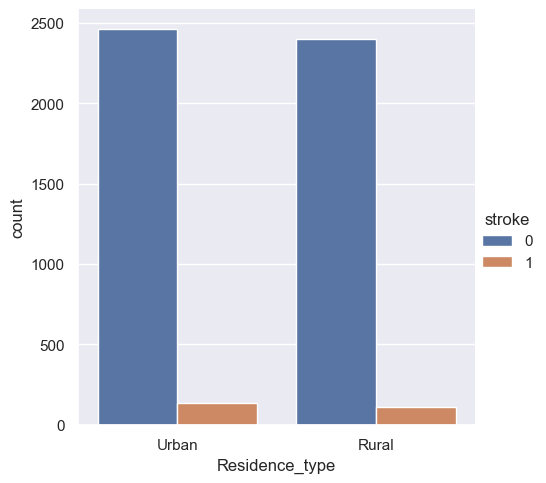

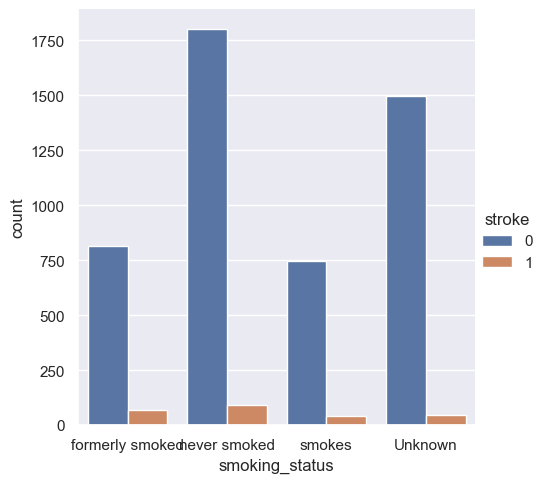

In [26]:
sns.catplot(x="gender", hue="stroke", data=stroke_df, kind="count")
sns.catplot(x="ever_married", hue="stroke", data=stroke_df, kind="count")
sns.catplot(x="work_type", hue="stroke", data=stroke_df, kind="count")
sns.catplot(x="Residence_type", hue="stroke", data=stroke_df, kind="count")
sns.catplot(x="smoking_status", hue="stroke", data=stroke_df, kind="count")

In [33]:

stroke_df.drop(['id'], axis=1,inplace=True)


In [17]:
print(stroke_df['stroke'].value_counts(normalize=True)*100)

stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64


In [19]:
stroke_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [23]:
stroke_df['bmi'].fillna(stroke_df['bmi'].mean(),inplace=True)

In [25]:
stroke_df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [34]:
le = LabelEncoder()
df = stroke_df.apply(le.fit_transform)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,240,1,1
1,0,82,0,0,1,3,0,3588,162,2,1
2,1,101,0,1,1,2,0,2483,199,2,1
3,0,70,0,0,1,2,1,3385,218,3,1
4,0,100,1,0,1,3,0,3394,113,2,1


<Axes: >

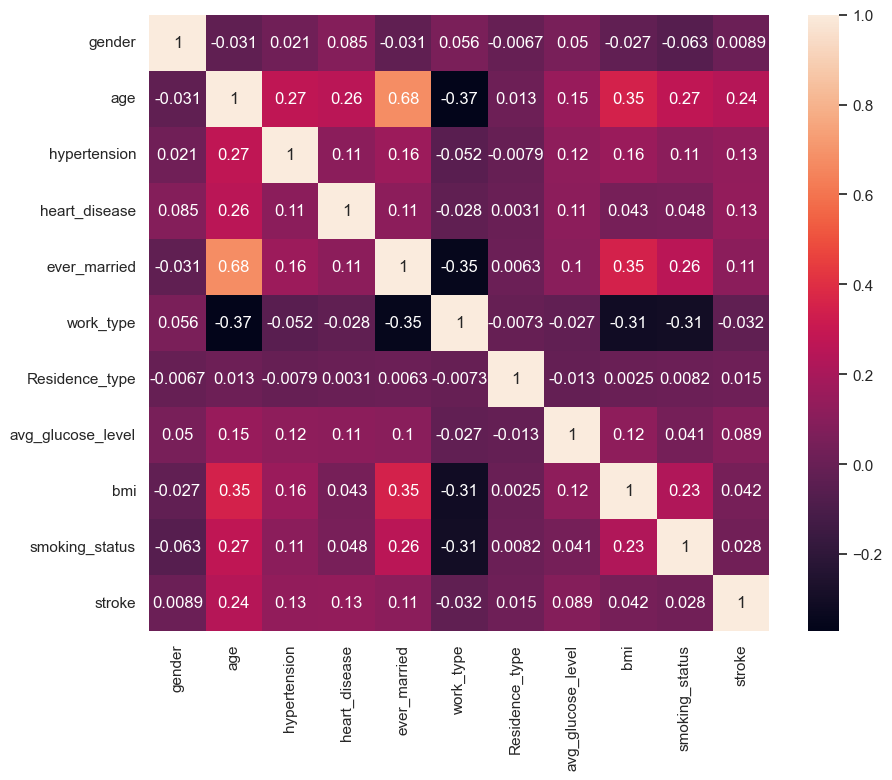

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

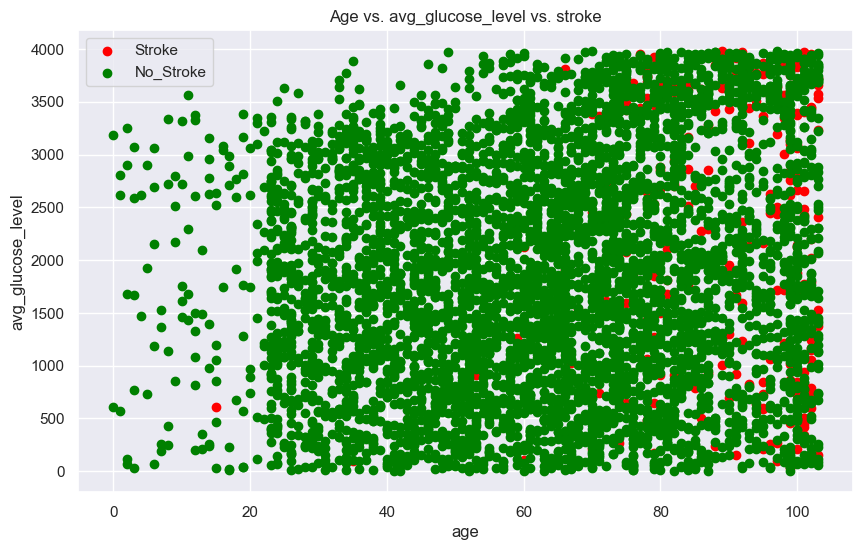

In [36]:

plt.figure(figsize=(10, 6))

stroke_data = df[df['stroke'] == 1]
plt.scatter(stroke_data['age'], stroke_data['avg_glucose_level'], color='red', label='Stroke')

no_stroke_data = df[df['stroke'] == 0]
plt.scatter(no_stroke_data['age'], no_stroke_data['avg_glucose_level'], color='green', label='No_Stroke')

plt.xlabel('age')
plt.ylabel('avg_glucose_level')
plt.legend()
plt.title('Age vs. avg_glucose_level vs. stroke')

plt.show()

In [38]:
X = df.drop('stroke', axis=1)
y = df['stroke']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
RFC = RandomForestClassifier(n_estimators=100, random_state=42)


In [43]:
RFC.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
y_pred = RFC.predict(X_test)

In [55]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")


Accuracy: 0.9383561643835616


In [75]:
DTR = DecisionTreeClassifier(max_depth= 50 ,random_state=42)

In [76]:
DTR.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=50, random_state=42)

In [77]:
y_pred = DTR.predict(X_test)

In [78]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.910958904109589


In [79]:
results = []
for i in range(1,100):
    
    DTR = DecisionTreeClassifier(max_depth=i, 
                                 random_state=42)


    DTR.fit(X_train,y_train)
    y_pred = DTR.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
  

    results.append(accuracy)

In [81]:
max(results)

0.9403131115459883

In [82]:
print(results)

[0.9393346379647749, 0.9393346379647749, 0.9403131115459883, 0.9393346379647749, 0.9383561643835616, 0.9373776908023483, 0.9363992172211351, 0.9266144814090019, 0.9266144814090019, 0.923679060665362, 0.9207436399217221, 0.9148727984344422, 0.9187866927592955, 0.910958904109589, 0.9070450097847358, 0.910958904109589, 0.9099804305283757, 0.9090019569471625, 0.910958904109589, 0.910958904109589, 0.910958904109589, 0.910958904109589, 0.910958904109589, 0.910958904109589, 0.910958904109589, 0.910958904109589, 0.910958904109589, 0.910958904109589, 0.910958904109589, 0.910958904109589, 0.910958904109589, 0.910958904109589, 0.910958904109589, 0.910958904109589, 0.910958904109589, 0.910958904109589, 0.910958904109589, 0.910958904109589, 0.910958904109589, 0.910958904109589, 0.910958904109589, 0.910958904109589, 0.910958904109589, 0.910958904109589, 0.910958904109589, 0.910958904109589, 0.910958904109589, 0.910958904109589, 0.910958904109589, 0.910958904109589, 0.910958904109589, 0.9109589041095

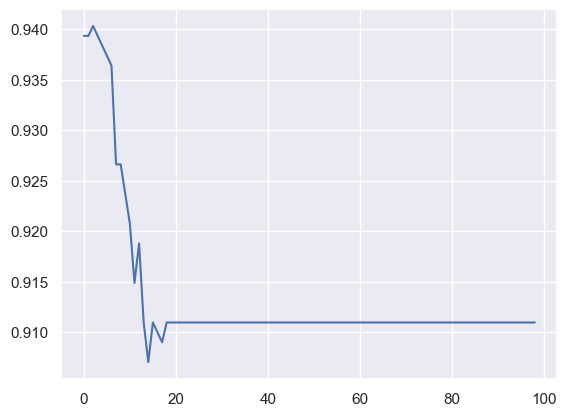

In [83]:
plt.plot(results)

In [97]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [98]:
steps = [('scaler', StandardScaler()), ('SVM', SVC())]
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps) # define the pipeline object.

In [99]:
X = df.drop('stroke', axis=1)
Y = df['stroke']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=30, stratify=Y)

In [101]:
parameteres = {'SVM__C':[0.001,0.1,10,100,10e5], 'SVM__gamma':[0.1,0.01]}

In [102]:
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5)

In [104]:
grid.fit(X_train, y_train)
print ("score = %3.2f" %(grid.score(X_test,y_test)))
print (grid.best_params_)